# Ensemble Learning and Random Forests

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

## Voting Classifiers

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state = 42)
rnd_clf = RandomForestClassifier(random_state = 42)
svm_clf = SVC(random_state = 42)
vot_clf = VotingClassifier(
    estimators = [
        ('lr', log_clf),
        ('rf', rnd_clf),
        ('svc', svm_clf)
    ],
    voting = 'hard'
)
vot_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [3]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, vot_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


/home/bladeray/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Bagging and Pasting
如果抽样时有放回，称为Bagging；当抽样没有放回，称为Pasting

## Bagging and Pasting in Scikit-Learn


In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 500,
    #max_samples = 100, 
    bootstrap = True, 
    n_jobs = -1 # 并行数int：个数 -1：跟CPU核数一致  1:默认值
)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred_bag)

0.912

## Out-of-Bag Evaluation
The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. 
it can be evaluated on these instances, without the need for a separate validation set or cross-validation. 

In [5]:
out_bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 600,
    #max_samples = 100, 
    bootstrap = True, 
    oob_score = True,
    n_jobs = -1
)
out_bag_clf.fit(X_train, y_train)
print("oob" + str(out_bag_clf.oob_score_))
y_pred_out_bag = out_bag_clf.predict(X_test)
accuracy_score(y_test, y_pred_out_bag)

oob0.896


0.912

In [6]:
out_bag_clf.oob_decision_function_

array([[0.45535714, 0.54464286],
       [0.41148325, 0.58851675],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06278027, 0.93721973],
       [0.37560976, 0.62439024],
       [0.00833333, 0.99166667],
       [0.99509804, 0.00490196],
       [0.97747748, 0.02252252],
       [0.75819672, 0.24180328],
       [0.0047619 , 0.9952381 ],
       [0.74660633, 0.25339367],
       [0.80094787, 0.19905213],
       [0.96744186, 0.03255814],
       [0.05454545, 0.94545455],
       [0.00431034, 0.99568966],
       [0.97807018, 0.02192982],
       [0.8940678 , 0.1059322 ],
       [1.        , 0.        ],
       [0.01869159, 0.98130841],
       [0.3254717 , 0.6745283 ],
       [0.92165899, 0.07834101],
       [1.        , 0.        ],
       [0.97095436, 0.02904564],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00423729, 0.99576271],
       [0.65517241, 0.34482759],
       [0.

## Random Patches and Random Subspaces
同时对训练数据和特征进行抽样称为Random Patches，只针对特征抽样而不针对训练数据抽样是Random Subspaces

## Random Forests

In [7]:
from sklearn.ensemble import RandomForestClassifier
#for i in range(20):
rnd_clf = RandomForestClassifier(n_estimators=600, max_leaf_nodes=11, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.92


In [8]:
# 与randomforest 近似
bag_clf_rf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=11),
    n_estimators=600, max_samples=1.0, bootstrap=True, n_jobs=-1
)
y_pred_bag_rf = out_bag_clf.predict(X_test)
accuracy_score(y_test, y_pred_bag_rf)

0.912

### Extra-Trees
对应scikit-learn的类为ExtraTreesClassifier（ExtraTreesRegressor），参数与随机森林相同。

### 特征重要性(Feature Importance)

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=11, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.10130515063744037
sepal width (cm) 0.02232306267105223
petal length (cm) 0.44188453773834047
petal width (cm) 0.4344872489531667


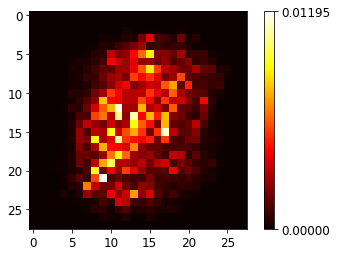

In [10]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])
importances = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(importances, cmap=matplotlib.cm.hot)
plt.colorbar(ticks = [rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])

## Boosting
主要思想是按顺序训练学习器，以尝试修改之前的学习器。

### AdaBoost
(1) m 个训练样本，w(i)初始化为1/m，经过j个学习器后错误率r(j)为：
r(j) = ∑w(i)(st.ŷj(i)≠y(i)) / ∑w(i)

(2)计算每个学习器的权值αj, αj=η*log((1−rj)/rj)

(3)更新权重w(i)
w(i) = w(i) st. ŷ j(i) = y(i)
w(i) = w(i)exp(αj) st. ŷj(i)≠y(i)

(4) 重复步骤1、 2、 3，

(5)计算每个分类器的权重和，预测为加权后最大的
ŷ(x)=argmax(∑αj st. ŷj(x)=k)

SVM算法由于训练速度慢且不稳定，所以不适合AdaBoost的基算法；如果产生过拟合可以减少学习器的数目；AdaBoost的缺点为不能并行，由于每一个学习器依赖上一个学习器。

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=500,
    algorithm="SAMME.R",
    learning_rate = 0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=500, random_state=None)

In [15]:
y_pred_ada = out_bag_clf.predict(X_test)
accuracy_score(y_test, y_pred_ada)

0.912

### Gradient Boosting
回归任务

In [157]:
import numpy.random as rnd
from sklearn.tree import DecisionTreeRegressor

X = rnd.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * rnd.randn(100)
# 为什么用X y_pred 为100维度，用X[:, 0] 就是1维
# 第一个模型
tree_reg1 = DecisionTreeRegressor(max_depth = 2, random_state=42)
tree_reg1.fit(X, y)
#第二个
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2, random_state=42)
tree_reg2.fit(X, y2)
#第三个
y3 = y - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2, random_state=42)
tree_reg3.fit(X, y3)
#预测
X_new=np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [158]:
y_pred

array([0.91348585])

NameError: name 'gbrt' is not defined

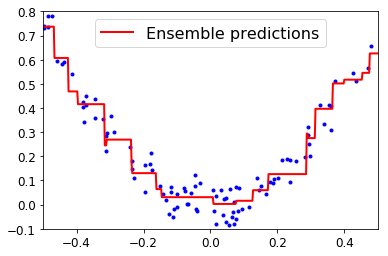

In [169]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
# 
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth = 2, n_estimators = 8, learning_rate = 0.5)
gbr.fit(X, y)
plot_predictions([gbr], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

#### 最优学习器
1. early stoping 对应使用staged_predict(),返回每增加一个学习期的预测结果
2. 使用warm_start， 当error不在下降的时候，停止


Text(0.5,1,'learning_rate=0.1, n_estimators=44')

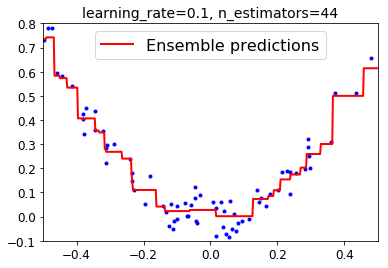

In [172]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y)
gbr_001 = GradientBoostingRegressor(max_depth=2, n_estimators=50)
gbr_001.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in gbr_001.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
gbr_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbr_best.fit(X_train, y_train)

plot_predictions([gbr_best], X_train, y_train, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbr_best.learning_rate, gbr_best.n_estimators), fontsize=14)

In [175]:

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=1, learning_rate=0.1, random_state=42, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping
print(gbrt.n_estimators)

50


## Stacking
多个分类器结果为特征，进行特征训练

实现这个思想的诀窍是将训练集分成三份，第一份用于训练多个基学习器，第二份用于训练第二个层（使用第一个层的预测器进行的预测作为输入），第三份用于训练第三层（使用第二层的预测器进行的预测作为输入）。

scikit-learn没有提供stacking的实现，但是实现并不困难，可以参见（https://github.com/viisar/brew）。 